In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

KeyboardInterrupt: 

ImportError: numpy._core.multiarray failed to import

## Architecture
* First we will have 1 weight which is enough for our simple case
* the non linear function will be f(x) = x (it will be linear for simplicity)
* 1 input "neuron" and 1 output neuron
* it will take blood glucose level as input and predict the age


we will take the transpose of the inputs to be able to calculate the dot product.

In [ ]:
#input
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


We could either drop the string columns or turn them into numbers, dropping them would be better as a starter, we would leave 3 columns, bmi, blood glucose level, and diabetes (output)

In [ ]:
df.drop(columns=["gender", "smoking_history",	'hypertension',	'heart_disease',	'bmi','HbA1c_level','diabetes'], inplace= True)

In [ ]:
df.duplicated().sum()
#duplicates, they are a lot because we only have 2 values now

np.int64(98358)

In [ ]:
df['blood_glucose_level'] = df['blood_glucose_level'].astype(dtype=np.float64)

In [ ]:
len(df)
#num of rows

100000

In [ ]:
pd.isna(df).sum()
#no null values

age                    0
blood_glucose_level    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   blood_glucose_level  100000 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


We will split the data into 2, the the inputs, outputs, and each will be split into 80:20 train:test split.

In [ ]:
train = df[['blood_glucose_level']][0:int(len(df)*0.8)]
test = df[['blood_glucose_level']][int(len(df)*0.8):]

train_out = df['age'][0:int(len(df)*0.8)]
test_out = df['age'][int(len(df)*0.8):]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   blood_glucose_level  80000 non-null  float64
dtypes: float64(1)
memory usage: 625.1 KB


In [ ]:
train
#we could see that the age and glucose level are directly proportional, even if by a small amount
# people are more probable to get diabetes after their 20s
train.corr()

,blood_glucose_level
blood_glucose_level,1.0


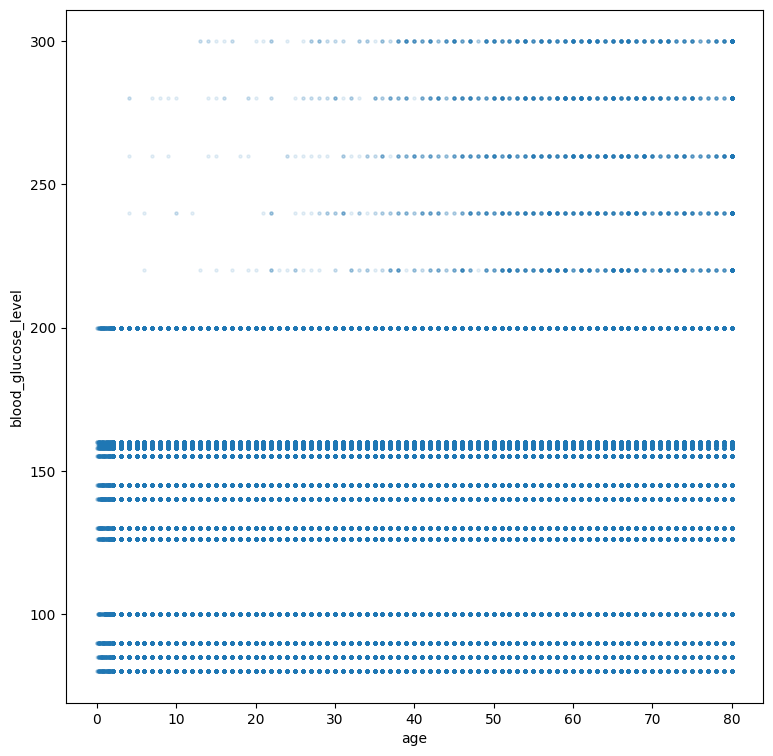

In [ ]:
df.plot(y = 'blood_glucose_level', x='age',kind='scatter', figsize=(9,9), alpha =0.1, s = 5);

## We will need:
* forward pass
* loss function
* optimizer using gradient descent

## Mathematical functions

In [ ]:
train_out

0        80.0
1        54.0
2        28.0
3        36.0
4        76.0
         ... 
79995    29.0
79996    12.0
79997    26.0
79998    47.0
79999    65.0
Name: age, Length: 80000, dtype: float64

In [ ]:
# row vectors has no axis to replace using transpose (80000, ) so it defaults to not changing, we need to reshape it manually to be 1 instead of (,)
bgl = np.array(train)

## forward pass

In [ ]:

np.random.seed = 12
w1 = np.random.randn(1, 1)
b1 = np.random.randn(1,1)


In [ ]:
train_out = np.array(train_out)

In [ ]:
def pass_net(input, start, end, param):
 b1 = 0
 #turn it into an array for processing and set the seed to save the results
 inputs = np.array(input)
 #print(inputs.shape)
 # @ is the dot product between the 2
 z = (inputs @ param + b1)
 return z[start:end]

## Forward pass + loss function

In [ ]:
def loss_net(input, start, end, real, w1):
 b1 = 0
 #turn it into an array for processing and set the seed to save the results
 inputs = np.array(input)
 #print(inputs.shape)
 # @ is the dot product between the 2
 z = (inputs @ w1 + b1)
 #squeezing may help get rid of extra dims to be manipulated, but if you are only sure that is the problem
 loss = (np.sqrt((real[start:end] - z[start:end])**2)).mean() #summing loss (with a mean)
 return loss

In [ ]:
outputs = loss_net(input= bgl,start=0, end=16, real= train_out, w1=w1)
outputs

np.float64(125.12842281381984)

# Gradient Descent

## Loop

### In this loop
we will go through the forward pass as normal, then calculate the loss of a batch of examples by using the simple (x-y)^2 formula, we will then use gradient descent

How the np.gradient() function works.
it takes a few parameters f, *varargs, axis, edge_order
f, the array of the y outputs
*varargs indicates the spacing between the measure of your x axis


We get the derivative of each parameter, like the first weight is directly proportional to itself and is equal to 1, others are dependent on other parameters and constants.

unfortunately, this is only useful for data that is in one array that you have samples of and the full array must be from the same function, not different functions like in our case, but our parameters are in different arrays

### Pytorch
pytorch uses something called a tensor, you can think of it just like a numpy array but for pytorch, you can turn arrays, integers and scalars into tensors, the requires_grad param is used if you want to track the gradient of a tensor.

### intuition

what pytorch is doing (the part we skipped from doing manually cause it is exhaustive at this scale, this is a shallow net yet it is hard to comput it by yourself or create algorithms for each param in our net) it takes the gradient (positive derivative) of each param in comparision to the loss, then it gets the gradient descent (-ve derivative), we then add it to the param after multiplying it by a learning rate to not skip the least loss point for that param, in reality we do that for all of the params at the same time for each batch (set of examples), we dont get the gradient of the input because we can't change it


In [ ]:
#learning rate
lr = 0.0005

In [ ]:
w1 = np.array([-4])
b1 = np.array([0])
#the loss is huge
loss_net(test,0, 15, train_out, w1)

np.float64(612.4666666666667)

In [ ]:
def gradient_descent(input,batch,x,y, le, param):
   
    loss = loss_net(input,batch*x, batch*y, train_out, param)
    # now since we have a loss function, even if it is a basic one, we just need to get the optimizer (backpropagation)
    #gradient descent.
    # change them a bit to get the derivative
    param= param+ 1e-5
    d_loss = loss_net(input,batch*x, batch*y, train_out, param)
    

    #return it to normal
    param = param-1e-5

    d_param= 1e-5 #a very small value (this is the remaining value from the small increase of w - previous w)

    print('derivative of param:',(d_loss-loss)/d_param) #derivative of param


    
    print('decreasing loss... param:', param)
    param = param - le *(d_loss-loss)/(d_param)
    print('new param:', param)
    print('old loss : ', loss)
    print('new loss smaller: ', loss_net(input,batch*x, batch*y, train_out, param))


    x = x +1
    y= y +1
    return y, x, param

In [ ]:

def training_loop(input, batch):
  global lr, w1
  x = 0
  y = 1
  while batch*y < 80000: # we check if the batch we reached is smaller than the number of examples
   
   y, x, w1 = gradient_descent(input, batch = batch, x=x, y=y, le=lr, param=w1)
   print(x,y)


In [ ]:
training_loop(bgl,10)


derivative of param: -130.30000000071595
decreasing loss... param: [-4.]
new param: [-3.93485]
old loss :  570.3
new loss smaller:  561.8109549999533
1 2
derivative of param: -139.79999999946813
decreasing loss... param: [-3.93485]
new param: [-3.86495]
old loss :  604.2920299999499
new loss smaller:  594.5200099999871
2 3
derivative of param: -124.90000000298095
decreasing loss... param: [-3.86495]
new param: [-3.8025]
old loss :  524.2322549999884
new loss smaller:  516.4322499998023
3 4
derivative of param: -153.1000000113636
decreasing loss... param: [-3.8025]
new param: [-3.72595]
old loss :  619.1627499997578
new loss smaller:  607.4429449988878
4 5
derivative of param: -137.1999999946638
decreasing loss... param: [-3.72595]
new param: [-3.65735]
old loss :  557.4003399990033
new loss smaller:  547.9884199993694
5 6
derivative of param: -149.30000002095767
decreasing loss... param: [-3.65735]
new param: [-3.5827]
old loss :  592.7423549993139
new loss smaller:  581.5971099977493


In [ ]:
#comparing the loss before and after, it fell a lot

print('old loss: ',loss_net(test,0, 15, train_out, np.array([-4])))
print('old output: ', pass_net(test,0,15,param= np.array([-4])))

print('new loss: ',loss_net(test,0, 15, train_out, w1))
print('real outputs:', np.array(test_out[0:15]))
print('new output: ', pass_net(test,0,15,param= w1))
print('loss for each value: ', np.sqrt((np.array(test_out[0:15]-pass_net(test,0,15,param= w1))**2)))
print('w1 param value: ', w1)

old loss:  612.4666666666667
old output:  [ -400.  -360.  -640.  -636.  -400.  -800.  -560.  -580. -1040.  -636.
  -400.  -636.  -520.  -400.  -360.]
new loss:  29.56753060862706
real outputs: [25. 44. 36. 40.  7. 48. 80. 75. 54. 67. 41. 21. 52. 12. 41.]
new output:  [27.5402967  24.78626703 44.06447472 43.78907175 27.5402967  55.0805934
 38.55641538 39.93343021 71.60477142 43.78907175 27.5402967  43.78907175
 35.80238571 27.5402967  24.78626703]
loss for each value:  [ 2.5402967  19.21373297  8.06447472  3.78907175 20.5402967   7.0805934
 41.44358462 35.06656979 17.60477142 23.21092825 13.4597033  22.78907175
 16.19761429 15.5402967  16.21373297]
w1 param value:  [0.27540297]


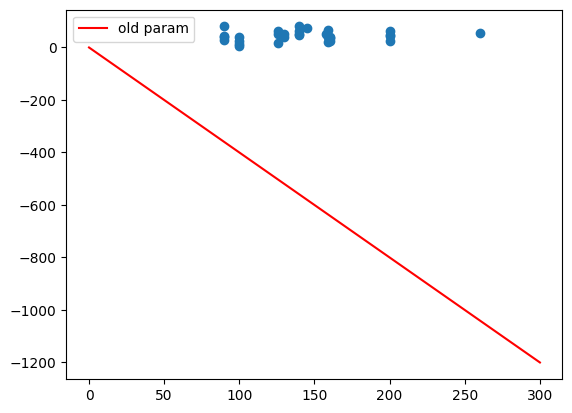

In [ ]:
plt.scatter(test[0:30], test_out[0:30])

x = np.linspace(0, 300, 1000)
#generates x values from 0 to 300, with 1000 values generated for x between for accuracy
#this generates a numpy array
old_w1 = np.array([-4])

z = x*old_w1
y = x*w1
#function y and z
plt.plot(x,z, label='old param', color = 'red')
plt.legend();

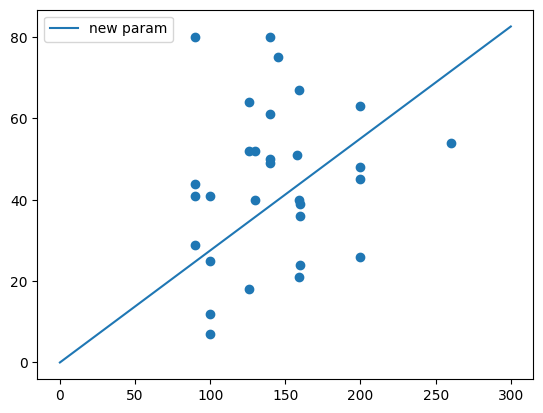

In [ ]:
plt.scatter(test[0:30], test_out[0:30])
plt.plot(x,y, label='new param')
#all that from just changing 1 weight
plt.legend();

### Results

Even if it is a simple net, we got relatively good results for a first time, we only used one weight, here are some notes for improvements next time:

* I am sure if we use the bias (and add more parameters) too we will get more accurate results as no-one is born with 0 blood glucose, so the bias would help.

* adding more features would help predict the data better (because we treat gradient descent as vector addition(which it is) through higher dimensional space, so more elements for our gradient would give us a pretty good vector that points toward the increase (which we then flip by multiplying it by -1)) Ex: 1 feature is like getting the highest point in a 2d part of a hill(the 2d space that is presenting a part that maybe isnt the highest of the 3d one), 2 features would show us what is around that hill in 3d, the top of it

* Using more proportional features

* We may have fell in a local minima even though I doubt it because it is a simple function. Trying more random variables of w1 will help solve this problem, even though finding the global minima isn't that necessary and may lead to overfitting (cause loss is 0)

* We could have used a too large learning rate but I doubt it because I tried changing it a few times.

* We should compute the loss of the test too in the loop, but our net is too simple to 'memorize' our data and we tested it at the end with good results

but for a first time, we got pretty good results.